In [8]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re

# Functions

In [9]:
# Define a function to extract the desired information
def extract_name_info(name):
    # Use regular expression to extract information
    match = re.match(r'^([^,]+),\s*([^\.]+)\.\s*([^()]+)\s*(?:\(([^)]+)\))?$', name)
    
    if match:
        first_name = match.group(1).strip()
        title = match.group(2).strip()
        family_name = match.group(3).strip()
        parenthetical_name = match.group(4).strip() if match.group(4) else None
        
        return pd.Series({'1st_name': first_name,
                          'title': title,
                          'family_name': family_name,
                          'parenthesis_name': parenthetical_name})
    else:
        return pd.Series({'1st_name': None,
                          'title': None,
                          'family_name': None,
                          'parenthesis_name': None})



In [10]:
test = pd.read_csv("./input/test.csv")
train = pd.read_csv("./input/train.csv")
display('test :',test.sample(5),'train :' ,train.sample(5))

'test :'

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
386,1278,3,"Aronsson, Mr. Ernst Axel Algot",male,24.0,0,0,349911,7.7750,NaN,S
193,1085,2,"Lingane, Mr. John",male,61.0,0,0,235509,12.3500,NaN,Q
19,911,3,"Assaf Khalil, Mrs. Mariana (Miriam"")""",female,45.0,0,0,2696,7.2250,NaN,C
106,998,3,"Buckley, Mr. Daniel",male,21.0,0,0,330920,7.8208,NaN,Q
63,955,3,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.7250,NaN,Q


'train :'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
522,523,0,3,"Lahoud, Mr. Sarkis",male,NaN,0,0,2624,7.2250,NaN,C
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.0000,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S
193,194,1,2,"Navratil, Master. Michel M",male,3.0,1,1,230080,26.0000,F2,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C


In [11]:
df = train.copy()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
print('NaN Values SUM : ') 
display(df.isna().sum())
print('NaN Values SUM : ') 
display(df.isna().mean().sort_values())

NaN Values SUM : 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

NaN Values SUM : 


PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
Age            0.198653
Cabin          0.771044
dtype: float64

In [13]:
df[(df['Embarked'].isna())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [14]:
print('Cabin Nan :')
print(f"1st class {df[(df['Pclass'].isin([1]))]['Cabin'].isna().mean()}")
print(f"2nd class {df[(df['Pclass'].isin([2]))]['Cabin'].isna().mean()}")
print(f"3th class {df[(df['Pclass'].isin([3]))]['Cabin'].isna().mean()}")

Cabin Nan :
1st class 0.18518518518518517
2nd class 0.9130434782608695
3th class 0.9755600814663951


In [15]:
df[(df['Pclass'].isin([3]))]['Cabin'].dropna()

10        G6
75     F G73
128    F E69
205       G6
251       G6
394       G6
429      E10
699    F G63
715    F G73
751     E121
776      F38
823     E121
Name: Cabin, dtype: object

In [16]:
print('Age Nan :')
print(f"1st class {df[(df['Pclass'].isin([1]))]['Age'].isna().mean()}")
print(f"2nd class {df[(df['Pclass'].isin([2]))]['Age'].isna().mean()}")
print(f"3th class {df[(df['Pclass'].isin([3]))]['Age'].isna().mean()}")

Age Nan :
1st class 0.1388888888888889
2nd class 0.059782608695652176
3th class 0.2769857433808554


In [17]:
# Apply the function to the 'Name' column and add the new columns to the dataframe
df[['1st_name', 'title', 'family_name', 'parenthesis_name']] = df['Name'].apply(extract_name_info)

# Save in name_column and drop 'Name'
name_df = df[['PassengerId','Name']]
df = df.drop(columns='Name')
# Display the resulting dataframe
display(df)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,1st_name,title,family_name,parenthesis_name
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris,None
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley,Florence Briggs Thayer
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina,None
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath,Lily May Peel
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,Montvila,Rev,Juozas,None
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,Graham,Miss,Margaret Edith,None
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,Miss,"Catherine Helen ""Carrie""",None
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,Behr,Mr,Karl Howell,None


In [18]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [19]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

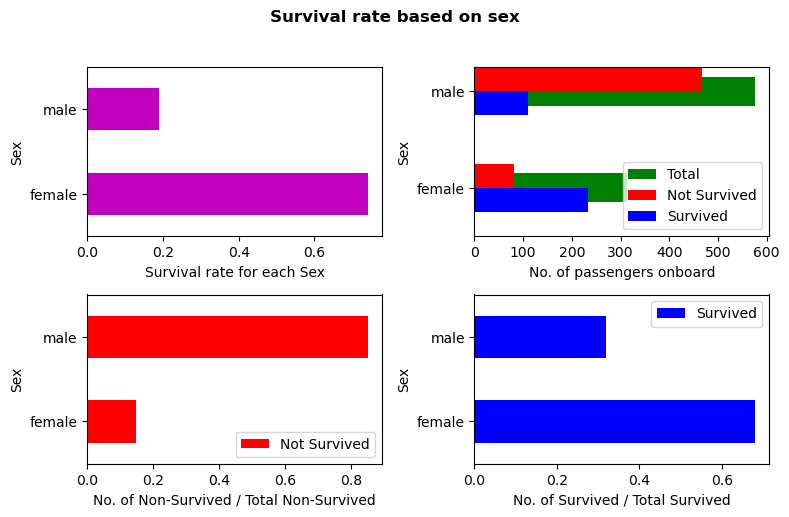

In [20]:
df_survived = df[df["Survived"]==1]
df_non_survived = df[df["Survived"]==0]
n = len(df)

# Visulizing the survival rate based on difference in sexes.
plt.figure(figsize=(8,5))
plt.suptitle('Survival rate based on sex', x=0.5, y= 1.025, fontsize=12, weight=550)

df_sex = df.groupby(["Survived","Sex"]).count()["PassengerId"]

plt.subplot(221)
(df_sex[1]/(df_sex[1]+df_sex[0])).plot(kind="barh", color="m", width=0.5)
plt.xlabel("Survival rate for each Sex")

plt.subplot(222)
df_sex = df.groupby(["Survived","Sex"])\
                            ["Sex"].count() # count of grouped data based on Sex for survival(1/0)
df.groupby("Sex").count()["PassengerId"].plot(kind="barh", color="g", \
                                                   width=0.3, legend=True, label="Total")
df_sex[0].plot(kind="barh", color="r", \
                    legend=True, position=0, width=0.25, label="Not Survived")
df_sex[1].plot(kind="barh", color="b", \
                    legend=True, position=1, width=0.25, label="Survived")
plt.xlabel("No. of passengers onboard")

# plt.subplot(222)
df_sex_per = df.groupby(["Survived","Sex"])["Sex"]\
                .count()/df["Sex"].count() # count of grouped data as a percentage of total population
# df_sex_per[0].plot(kind="barh", color="r", legend=True, position=0, width=0.25, label="Not Survived")
# df_sex_per[1].plot(kind="barh", color="b", legend=True, position=1, width=0.25, label="Survived")
# plt.xlabel("No. of passengers / Total ")


plt.subplot(223)
(df_non_survived.groupby(["Sex"])["PassengerId"].count()/len(df_non_survived))\
                .plot(kind="barh", color="r", legend=True, width=0.5, label="Not Survived")
plt.xlabel("No. of Non-Survived / Total Non-Survived")

plt.subplot(224)
(df_survived.groupby(["Sex"])["PassengerId"].count()/len(df_survived))\
                .plot(kind="barh", color="b", legend=True, width=0.5, label="Survived")
plt.xlabel("No. of Survived / Total Survived")

plt.tight_layout()
plt.show()

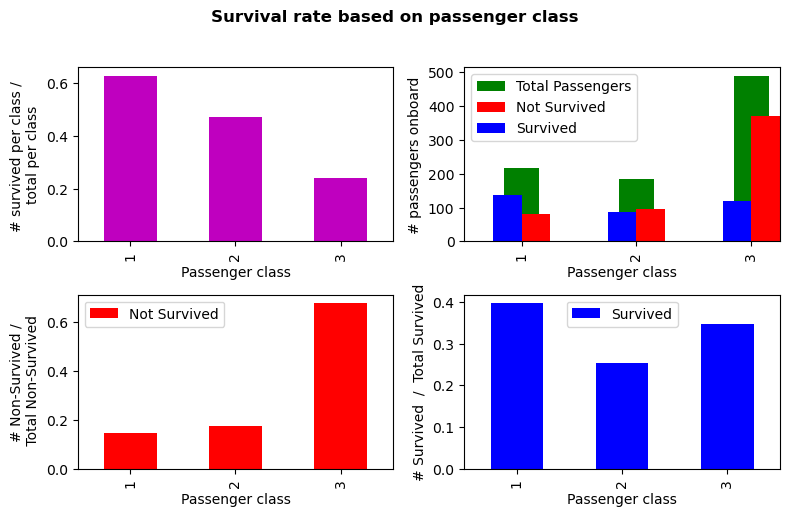

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64 
 Pclass
1    0.242424
2    0.206510
3    0.551066
Name: PassengerId, dtype: float64 
 Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Pclass, dtype: int64 
 Survived  Pclass
0         1         0.089787
          2         0.108866
          3         0.417508
1         1         0.152637
          2         0.097643
          3         0.133558
Name: Pclass, dtype: float64 
 Pclass
1    0.145719
2    0.176685
3    0.677596
Name: PassengerId, dtype: float64 
 Pclass
1    0.397661
2    0.254386
3    0.347953
Name: PassengerId, dtype: float64


In [21]:
df_pclass = df.groupby(["Survived", "Pclass"])["Pclass"].count()
df_pclass_per = df.groupby(["Survived", "Pclass"])["Pclass"].count()/n

plt.figure(figsize=(8,5))
plt.suptitle('Survival rate based on passenger class', x=0.5, y= 1.025, fontsize=12, weight=550)

plt.subplot(221)
(df_pclass[1]/(df_pclass[0]+df_pclass[1])).plot(kind="bar",\
                                        color="m",width=0.5)
plt.ylabel("# survived per class / \ntotal per class")
plt.xlabel("Passenger class")

plt.subplot(222)
df.groupby("Pclass").count()["PassengerId"].plot(kind="bar",\
                                        color="g",width=0.3, legend=True, label="Total Passengers")
df_pclass[0].plot(kind="bar", color="r", legend=True, position=0, width=0.25, label="Not Survived")
df_pclass[1].plot(kind="bar", color="b", legend=True, position=1, width=0.25, label="Survived")
plt.xlabel("Passenger class")
plt.ylabel("# passengers onboard")

plt.subplot(223)
(df_non_survived.groupby(["Pclass"])["PassengerId"].count()/len(df_non_survived))\
                .plot(kind="bar", color="r", legend=True, width=0.5, label="Not Survived")
plt.ylabel("# Non-Survived /\n Total Non-Survived")
plt.xlabel("Passenger class")

plt.subplot(224)
(df_survived.groupby(["Pclass"])["PassengerId"].count()/len(df_survived))\
                .plot(kind="bar", color="b", legend=True, width=0.5, label="Survived")
plt.ylabel("# Survived  /  Total Survived")
plt.xlabel("Passenger class")

plt.tight_layout()
plt.show()

print(df.groupby("Pclass").count()["PassengerId"],"\n",\
      df.groupby("Pclass").count()["PassengerId"]/n,"\n",\
      df_pclass,"\n",df_pclass_per,"\n", \
     (df_non_survived.groupby(["Pclass"])["PassengerId"].count()/len(df_non_survived)), "\n",\
     (df_survived.groupby(["Pclass"])["PassengerId"].count()/len(df_survived)))

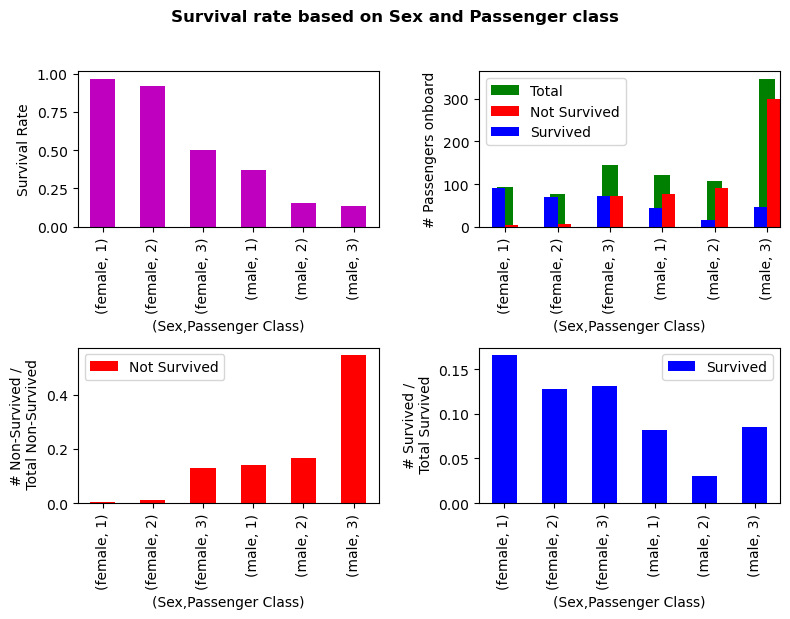

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Pclass, dtype: int64

Survival Rate :
 Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Pclass, dtype: float64


In [22]:
# grouping data by Survived, Sex and Pclass
df_sex_pclass = df.groupby(["Survived", "Sex","Pclass"])["Pclass"].count()
df_sex_pclass_per = df.groupby(["Survived","Sex","Pclass"])["Pclass"].count()/n

plt.figure(figsize=(8,6))
plt.suptitle('Survival rate based on Sex and Passenger class', x=0.5, y= 1.025, fontsize=12, weight=550)

plt.subplot(221)
(df_sex_pclass[1]/(df_sex_pclass[0]+df_sex_pclass[1])).plot(kind="bar",\
                                        color="m",width=0.5)
plt.xlabel("(Sex,Passenger Class)")
plt.ylabel("Survival Rate")

plt.subplot(222)
(df_sex_pclass[0]+df_sex_pclass[1]).plot(kind="bar", color="g", \
                           legend=True, width=0.3, label="Total")
df_sex_pclass[0].plot(kind="bar", color="r", legend=True,\
                           position=0, width=0.25, label="Not Survived")
df_sex_pclass[1].plot(kind="bar", color="b", legend=True,\
                           position=1, width=0.25, label="Survived")
plt.xlabel("(Sex,Passenger Class)")
plt.ylabel("# Passengers onboard")

plt.subplot(223)
(df_non_survived.groupby(["Sex","Pclass"])["PassengerId"].count()/len(df_non_survived))\
                .plot(kind="bar", color="r", legend=True, width=0.5, label="Not Survived")
plt.ylabel("# Non-Survived /\n Total Non-Survived")
plt.xlabel("(Sex,Passenger Class)")

plt.subplot(224)
(df_survived.groupby(["Sex","Pclass"])["PassengerId"].count()/len(df_non_survived))\
                .plot(kind="bar", color="b", legend=True, width=0.5, label="Survived")
plt.ylabel("# Survived /\n Total Survived")
plt.xlabel("(Sex,Passenger Class)")


plt.tight_layout()
plt.show()

# print(df_pclass[0])
print(df_pclass)
print("\nSurvival Rate :\n",df_sex_pclass[1]/(df_sex_pclass[0]+df_sex_pclass[1]))

# Prediction

In [23]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,1st_name,title,family_name,parenthesis_name
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris,None
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley,Florence Briggs Thayer
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina,None
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath,Lily May Peel
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,Montvila,Rev,Juozas,None
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,Graham,Miss,Margaret Edith,None
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,Miss,"Catherine Helen ""Carrie""",None
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,Behr,Mr,Karl Howell,None


In [24]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf

In [25]:
def tokenize_names(features, labels=None):
    """Divite the names into tokens. TF-DF can consume text tokens natively."""
    features["Name"] =  tf.strings.split(features["Name"])
    return features, labels

In [27]:

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(df,label="Survived")#.map(tokenize_names)
serving_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test)#.map(tokenize_names)

<_PrefetchDataset element_spec=({'PassengerId': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'Pclass': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'Sex': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'Age': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'SibSp': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'Parch': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'Ticket': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'Fare': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Cabin': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'Embarked': TensorSpec(shape=(None,), dtype=tf.string, name=None), '1st_name': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'title': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'family_name': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'parenthesis_name': TensorSpec(shape=(None,), dtype=tf.string, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name

In [31]:
input_features = df.columns.difference(['PassengerId','Survived','Tikcket','parenthesis_name'])

In [32]:
model = tfdf.keras.GradientBoostedTreesModel(
    verbose=0, # Very few logs
    features=[tfdf.keras.FeatureUsage(name=n) for n in input_features],
    exclude_non_specified_features=True, # Only use the features in "features"
    random_seed=1234,
)
model.fit(train_ds)

self_evaluation = model.make_inspector().evaluation()
print(f"Accuracy: {self_evaluation.accuracy} Loss:{self_evaluation.loss}")

[WARNING 24-01-25 14:39:18.2132 CET gradient_boosted_trees.cc:1886] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-01-25 14:39:18.2139 CET gradient_boosted_trees.cc:1897] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-01-25 14:39:18.2139 CET gradient_boosted_trees.cc:1911] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
[INFO 24-01-25 14:39:22.8480 CET kernel.cc:1233] Loading model from path /tmp/tmpgwewuybm/model/ with prefix 9d2b99b27a934a7f
[INFO 24-01-25 14:39:22.8502 CET quick_scorer_extended.cc:903] The binary was compiled without AVX2 support, but your CPU supports it. Enable it for faster model inference.
[INFO 24-01-25 14:39:22.8504 CET abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 24-01-25 14:39:22.8504 CET kernel.cc:1061] Use fast generic engine


Accuracy: 0.8586956262588501 Loss:0.8409057259559631


In [33]:
model = tfdf.keras.GradientBoostedTreesModel(
    verbose=0, # Very few logs
    features=[tfdf.keras.FeatureUsage(name=n) for n in input_features],
    exclude_non_specified_features=True, # Only use the features in "features"
    
    #num_trees=2000,
    
    # Only for GBT.
    # A bit slower, but great to understand the model.
    # compute_permutation_variable_importance=True,
    
    # Change the default hyper-parameters
    # hyperparameter_template="benchmark_rank1@v1",
    
    #num_trees=1000,
    #tuner=tuner
    
    min_examples=1,
    categorical_algorithm="RANDOM",
    #max_depth=4,
    shrinkage=0.05,
    #num_candidate_attributes_ratio=0.2,
    split_axis="SPARSE_OBLIQUE",
    sparse_oblique_normalization="MIN_MAX",
    sparse_oblique_num_projections_exponent=2.0,
    num_trees=2000,
    #validation_ratio=0.0,
    random_seed=1234,
    
)
model.fit(train_ds)

self_evaluation = model.make_inspector().evaluation()
print(f"Accuracy: {self_evaluation.accuracy} Loss:{self_evaluation.loss}")

[WARNING 24-01-25 14:40:27.5930 CET gradient_boosted_trees.cc:1886] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-01-25 14:40:27.5930 CET gradient_boosted_trees.cc:1897] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-01-25 14:40:27.5931 CET gradient_boosted_trees.cc:1911] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Accuracy: 0.79347825050354 Loss:0.9514787793159485


[INFO 24-01-25 14:40:28.0894 CET kernel.cc:1233] Loading model from path /tmp/tmpuvol024u/model/ with prefix d07251edb0404448
[INFO 24-01-25 14:40:28.0932 CET decision_forest.cc:660] Model loaded with 47 root(s), 2573 node(s), and 11 input feature(s).
[INFO 24-01-25 14:40:28.0932 CET abstract_model.cc:1344] Engine "GradientBoostedTreesGeneric" built
[INFO 24-01-25 14:40:28.0932 CET kernel.cc:1061] Use fast generic engine


In [34]:
model.summary()

Model: "gradient_boosted_trees_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "GRADIENT_BOOSTED_TREES"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (12):
	1st_name
	Age
	Cabin
	Embarked
	Fare
	Parch
	Pclass
	Sex
	SibSp
	Ticket
	family_name
	title

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.       "title"  0.924927 ################
    2.         "Age"  0.329988 ###
    3.        "Fare"  0.293931 ##
    4.      "Ticket"  0.180821 
    5.       "Parch"  0.178412 
    6.    "Embarked"  0.176970 
    7.      "Pclass"  0.176213 
    8.         "Sex"  0.175538 
    9. "family_name"  0.175098 
   10.    "1st_name"  0.172665 
   11.       "SibSp"  0.170615 

Variable Importance: NUM_AS_ROOT:
    1. "title" 46.00